# Modelo 2

     Screening_date  Gender   Age  Personal_cancer_history  \
0        2022-07-23     1.0  53.0                      0.0   
1        2022-07-23     1.0  35.0                      0.0   
2        2022-07-23     1.0  47.0                      0.0   
3        2022-07-23     1.0  54.0                      0.0   
4        2022-07-23     1.0  71.0                      1.0   
...             ...     ...   ...                      ...   
8389     2024-03-16     0.0  51.0                      0.0   
8390     2024-03-16     0.0  74.0                      0.0   
8391     2024-03-16     1.0  62.0                      1.0   
8392     2024-03-16     1.0  78.0                      0.0   
8393     2024-03-16     1.0  70.0                      0.0   

      Family_cancer_history  Sun_exposure  Body_signs  Premalignant  \
0                       1.0           1.0         1.0             1   
1                       1.0           1.0         1.0             1   
2                       1.0           0.0 

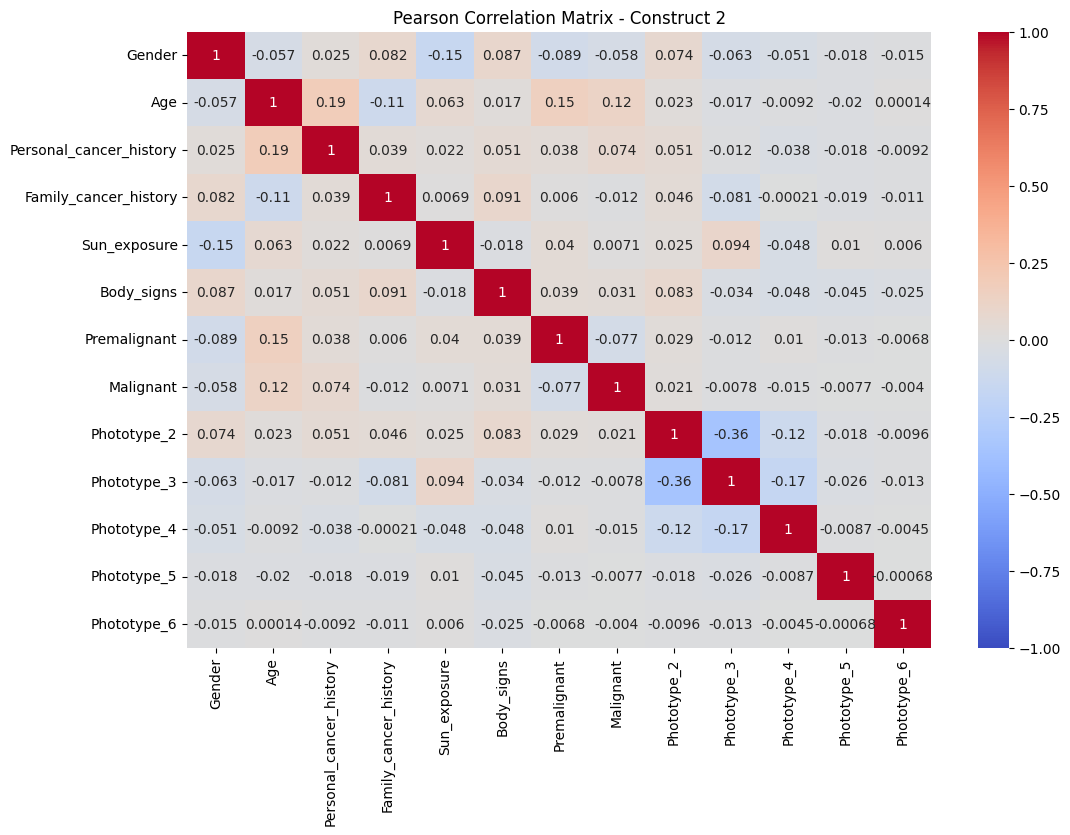

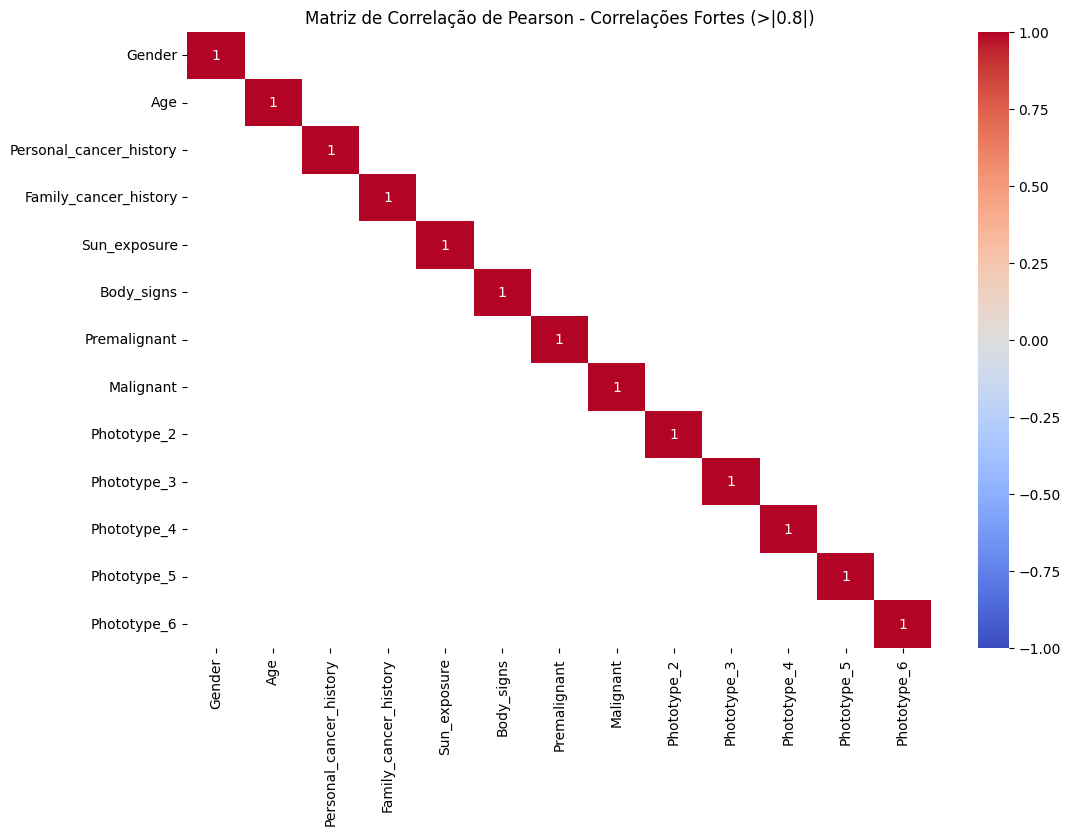

In [1]:
# pearson correlation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

print(df)

print(df.columns)

# Eliminar a primeira coluna (variável resposta)
df_sem_resposta = df.iloc[:, 1:]

# Calcular a correlação de Pearson
correlacao_pearson = df_sem_resposta.corr(method='pearson')

# Configuração do tamanho das figuras
plt.figure(figsize=(12, 8))
# Plotar a matriz de correlação com todas as correlações
sns.heatmap(correlacao_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix - Construct 2')
plt.show()
# Filtrar as correlações fortes (acima de 0.8 ou abaixo de -0.8)
correlacao_forte = correlacao_pearson[(correlacao_pearson > 0.8) | (correlacao_pearson < -0.8)]
# Plotar a matriz de correlação com as correlações fortes
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_forte, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson - Correlações Fortes (>|0.8|)')
plt.show()

# Modelo 3

Target days

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o DataFrame original
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

# Converter a data para datetime
df['Screening_date'] = pd.to_datetime(df['Screening_date'])

# Criar um DataFrame com o total de rastreios por data
total_screenings_df = df.groupby('Screening_date').size().reset_index(name='Total_screenings')

total_screenings_df

# Criar um intervalo de datas completo
min_date = df['Screening_date'].min()
max_date = df['Screening_date'].max()
date_range = pd.date_range(start=min_date, end=max_date)

# Criar um DataFrame com todas as datas do intervalo
all_dates_df = pd.DataFrame(date_range, columns=['Screening_date'])

# Fazer o merge de total_screenings_df com all_dates_df
complete_screenings_df = all_dates_df.merge(total_screenings_df, on='Screening_date', how='left')

# Substituir os valores ausentes por 0
complete_screenings_df['Total_screenings'] = complete_screenings_df['Total_screenings'].fillna(0).astype(int)

print(complete_screenings_df)

df = complete_screenings_df

# Assuming your DataFrame has a column named 'date' that contains date information
df['Screening_date'] = pd.to_datetime(df['Screening_date'])  # Convert the date column to datetime
df.set_index('Screening_date', inplace=True)  # Set the date column as the index

df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)
df['day_of_year'] = df.index.dayofyear
df['time_trend'] = range(len(df))
df['season'] = (df['month'] % 12 + 3) // 3

df['lag_1'] = df['Total_screenings'].shift(1)
df['lag_7'] = df['Total_screenings'].shift(7)

df['rolling_mean_7'] = df['Total_screenings'].rolling(window=7).mean()
df['rolling_std_7'] = df['Total_screenings'].rolling(window=7).std()

# Remover linhas com quaisquer valores NaN
df.dropna(inplace=True)

df

    Screening_date  Total_screenings
0       2022-03-03                92
1       2022-03-04                 0
2       2022-03-05                 0
3       2022-03-06                 0
4       2022-03-07                 0
..             ...               ...
782     2024-04-23                 0
783     2024-04-24                 0
784     2024-04-25                 0
785     2024-04-26                 0
786     2024-04-27               184

[787 rows x 2 columns]


,Total_screenings,day_of_week,month,is_weekend,day_of_year,time_trend,season,lag_1,lag_7,rolling_mean_7,rolling_std_7
Screening_date,,,,,,,,,,,
2022-03-10,0,3,3,0,69,7,2,0.0,92.0,0.000000,0.000000
2022-03-11,0,4,3,0,70,8,2,0.0,0.0,0.000000,0.000000
2022-03-12,0,5,3,1,71,9,2,0.0,0.0,0.000000,0.000000
2022-03-13,0,6,3,1,72,10,2,0.0,0.0,0.000000,0.000000
2022-03-14,0,0,3,0,73,11,2,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,0,1,4,0,114,782,2,0.0,0.0,26.571429,70.301392
2024-04-24,0,2,4,0,115,783,2,0.0,0.0,26.571429,70.301392
2024-04-25,0,3,4,0,116,784,2,0.0,0.0,26.571429,70.301392


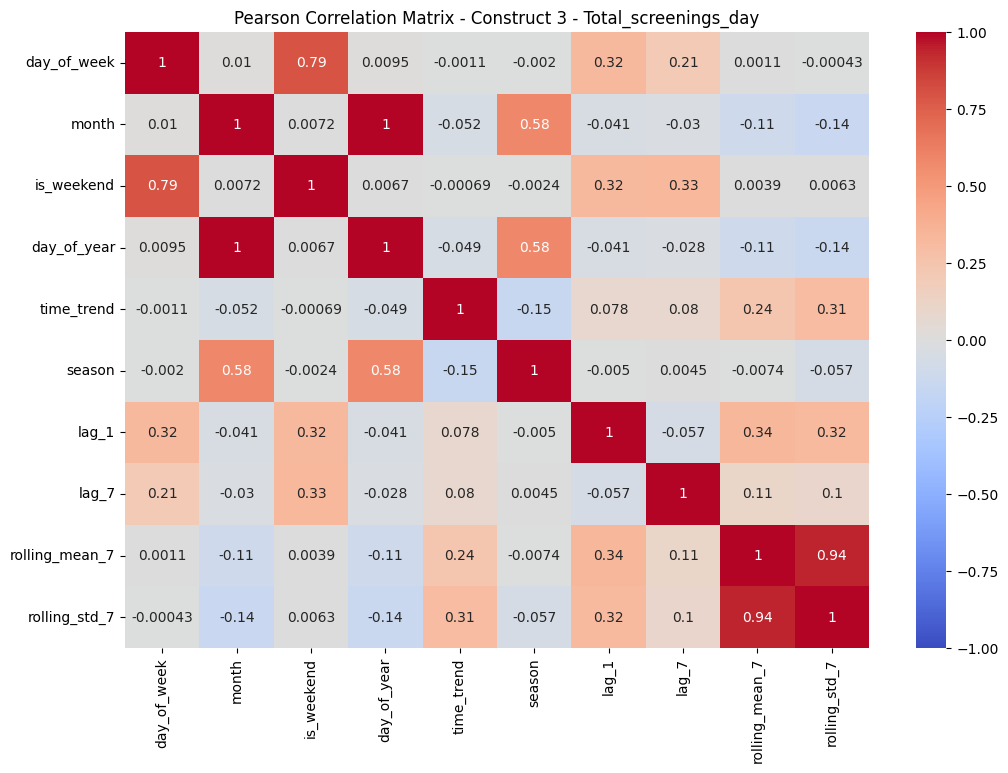

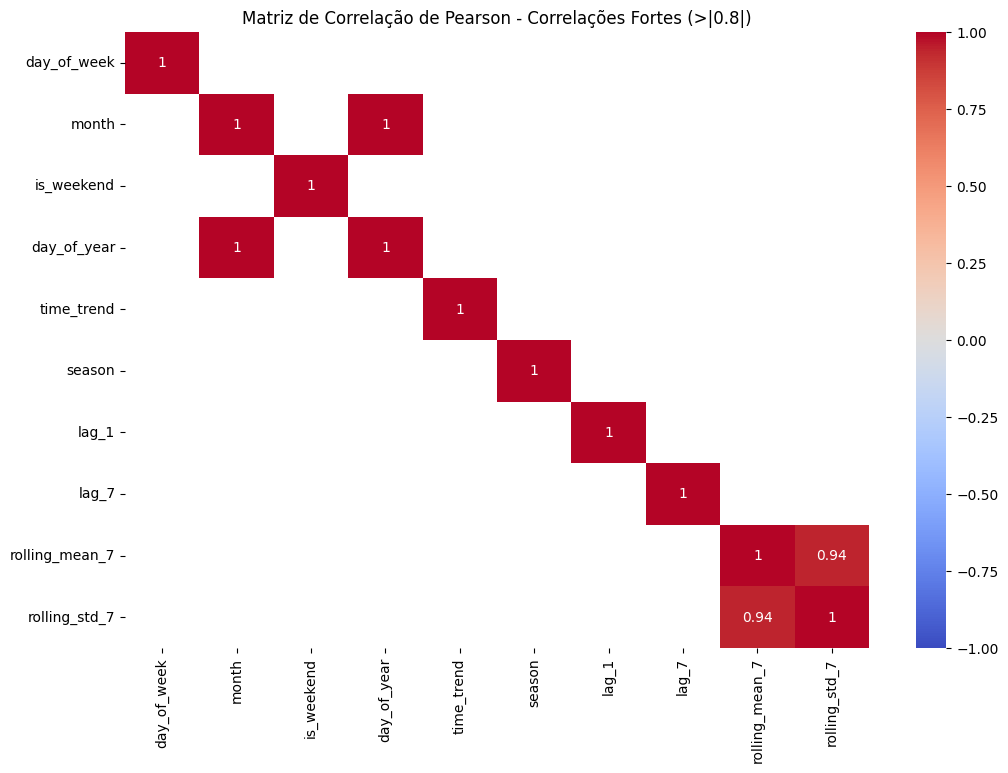

In [3]:
# Eliminar a primeira coluna (variável resposta)
df_sem_resposta = df.iloc[:, 1:]

# Calcular a correlação de Pearson
correlacao_pearson = df_sem_resposta.corr(method='pearson')

# Configuração do tamanho das figuras
plt.figure(figsize=(12, 8))
# Plotar a matriz de correlação com todas as correlações
sns.heatmap(correlacao_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix - Construct 3 - Total_screenings_day')
plt.show()
# Filtrar as correlações fortes (acima de 0.8 ou abaixo de -0.8)
correlacao_forte = correlacao_pearson[(correlacao_pearson > 0.8) | (correlacao_pearson < -0.8)]
# Plotar a matriz de correlação com as correlações fortes
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_forte, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson - Correlações Fortes (>|0.8|)')
plt.show()

In [4]:
# Remover a coluna 'day_of_week' do DataFrame
df.drop(columns=['day_of_year'], inplace=True)

# Remover a coluna 'rolling_mean_7' do DataFrame
df.drop(columns=['rolling_mean_7'], inplace=True)

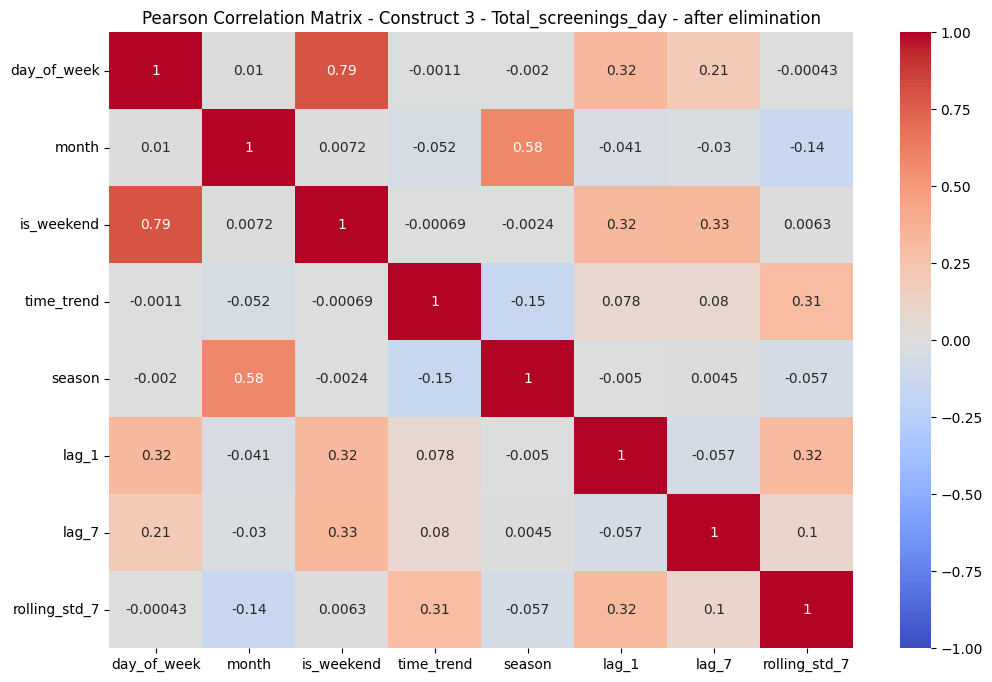

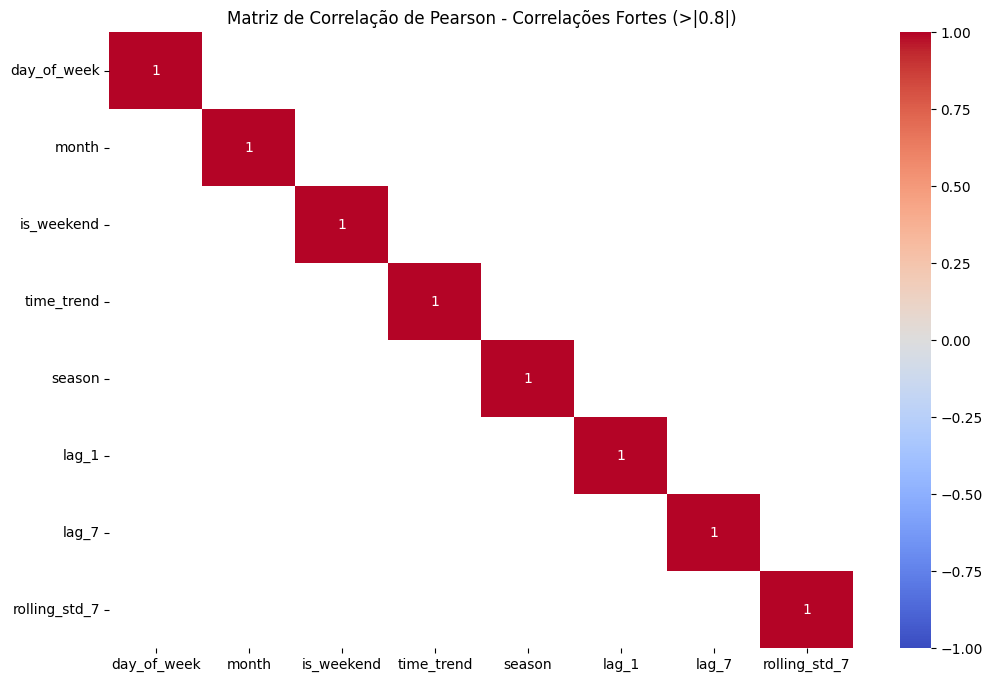

In [5]:
# Eliminar a primeira coluna (variável resposta)
df_sem_resposta = df.iloc[:, 1:]

# Calcular a correlação de Pearson
correlacao_pearson = df_sem_resposta.corr(method='pearson')

# Configuração do tamanho das figuras
plt.figure(figsize=(12, 8))
# Plotar a matriz de correlação com todas as correlações
sns.heatmap(correlacao_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix - Construct 3 - Total_screenings_day - after elimination')
plt.show()
# Filtrar as correlações fortes (acima de 0.8 ou abaixo de -0.8)
correlacao_forte = correlacao_pearson[(correlacao_pearson > 0.8) | (correlacao_pearson < -0.8)]
# Plotar a matriz de correlação com as correlações fortes
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_forte, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson - Correlações Fortes (>|0.8|)')
plt.show()

Target weeks

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o DataFrame
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

# Converter a data para datetime e ordenar de forma crescente
df['Screening_date'] = pd.to_datetime(df['Screening_date'])
df = df.sort_values(by='Screening_date')

# Lista das colunas que deseja eliminar
columns_to_drop = [
    'Gender', 'Age', 'Personal_cancer_history', 'Family_cancer_history',
    'Sun_exposure', 'Body_signs', 'Premalignant', 'Malignant',
    'Phototype_2', 'Phototype_3', 'Phototype_4', 'Phototype_5', 'Phototype_6'
]

# Eliminar as colunas do DataFrame
df = df.drop(columns=columns_to_drop)


df.columns

# Criar as variáveis exógenas (VVs) diretamente a partir da data dos rastreios
df['Year'] = df['Screening_date'].dt.year
df['Month'] = df['Screening_date'].dt.month
df['Dia_da_Semana'] = df['Screening_date'].dt.day_name()
df['Semana_do_Ano'] = df['Screening_date'].dt.isocalendar().week

from scipy.stats import mode

# Criar a coluna 'Semana' para agrupar por semana
df['Semana'] = df['Screening_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Agora agregue as VVs corretamente
df_week = df.groupby('Semana').agg({
    'Ano': 'first',                           # Ano da primeira ocorrência na semana
    'Mês': 'first',                           # Mês da primeira ocorrência na semana
    'Dia_da_Semana': lambda x: x.mode()[0], # Dia da semana mais frequente
    'Semana_do_Ano': 'first'                 # Semana do ano da primeira ocorrência na semana                  
}).reset_index()

# Adicionar a contagem de rastreios por semana
df_week['week_screenings'] = df.groupby('Semana')['Screening_date'].size().values

# Renomear a coluna 'Screening_date' para 'week_screenings'
df_week.rename(columns={'Screening_date': 'week_screenings'}, inplace=True)

# Remover as linhas onde week_screenings é igual a 0 (opcional)
df_week = df_week[df_week['week_screenings'] != 0]

# Criar variáveis dummy para 'Dia_da_Semana'
df_week = pd.get_dummies(df_week, columns=['Dia_da_Semana'], drop_first=True)

# Select the columns that start with 'Dia_da_Semana_'
dia_da_semana_columns = [col for col in df_week.columns if col.startswith('Dia_da_Semana_')]

# Convert True/False to 0/1
df_week[dia_da_semana_columns] = df_week[dia_da_semana_columns].astype(int)

# Calcular variáveis adicionais após a agregação
df_week['Total_Cumulativo'] = df_week['week_screenings'].cumsum()
df_week['Diferença_Semanal'] = df_week['week_screenings'].diff().fillna(0)
df_week['Tendência_4_Semanas'] = df_week['week_screenings'].rolling(window=4).mean()

df = df_week

df

,Semana,Ano,Mês,Semana_do_Ano,week_screenings,Dia_da_Semana_Monday,Dia_da_Semana_Saturday,Dia_da_Semana_Sunday,Dia_da_Semana_Thursday,Dia_da_Semana_Wednesday,Total_Cumulativo,Diferença_Semanal,Tendência_4_Semanas
0,2022-02-28,2022,3,9,92,0,0,0,1,0,92,0.0,NaN
1,2022-03-14,2022,3,11,62,0,1,0,0,0,154,-30.0,NaN
2,2022-03-21,2022,3,12,90,0,1,0,0,0,244,28.0,NaN
3,2022-04-04,2022,4,14,139,0,1,0,0,0,383,49.0,95.75
4,2022-04-18,2022,4,16,173,0,1,0,0,0,556,34.0,116.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2024-03-18,2024,3,12,168,0,1,0,0,0,7584,-240.0,243.25
71,2024-03-25,2024,3,13,198,0,1,0,0,0,7782,30.0,243.00
72,2024-04-01,2024,4,14,242,0,1,0,0,0,8024,44.0,254.00
73,2024-04-15,2024,4,16,186,0,1,0,0,0,8210,-56.0,198.50


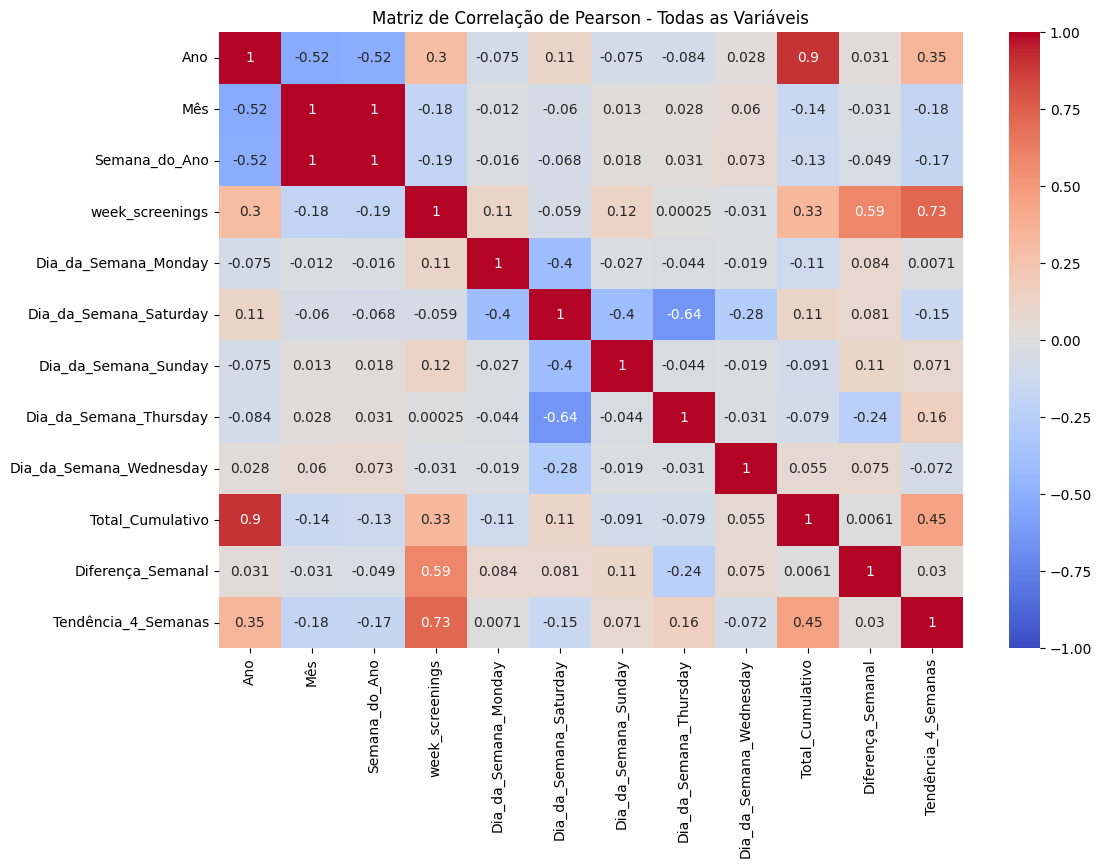

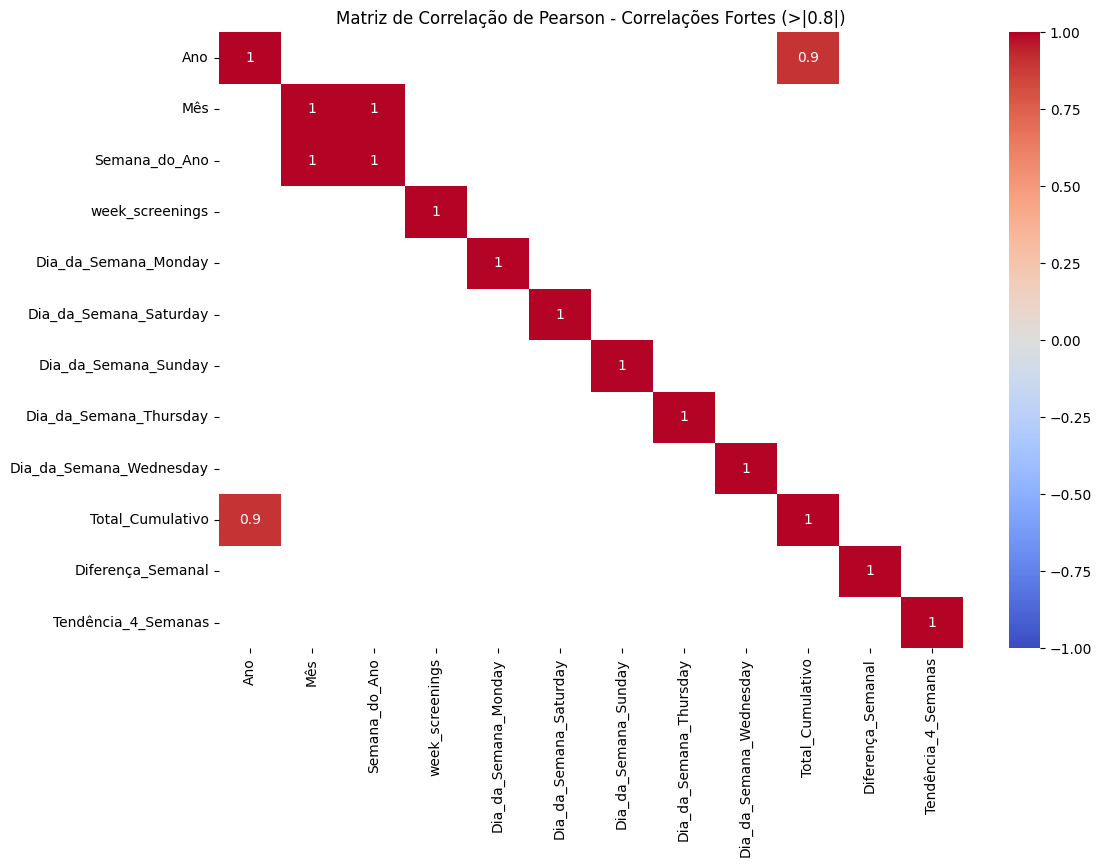

In [25]:
# Eliminar a primeira coluna (variável resposta)
df_sem_resposta = df.iloc[:, 1:]

# Calcular a correlação de Pearson
correlacao_pearson = df_sem_resposta.corr(method='pearson')

# Configuração do tamanho das figuras
plt.figure(figsize=(12, 8))
# Plotar a matriz de correlação com todas as correlações
sns.heatmap(correlacao_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson - Todas as Variáveis')
plt.show()
# Filtrar as correlações fortes (acima de 0.8 ou abaixo de -0.8)
correlacao_forte = correlacao_pearson[(correlacao_pearson > 0.8) | (correlacao_pearson < -0.8)]
# Plotar a matriz de correlação com as correlações fortes
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_forte, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson - Correlações Fortes (>|0.8|)')
plt.show()

In [26]:
# Remove the 'Total_Cumulativo' column from df_week
df = df.drop(columns=['Total_Cumulativo'])

# Remove the 'Total_Cumulativo' column from df_week
df = df.drop(columns=['Mês'])

# Supondo que o DataFrame seja chamado 'df'
df = df.dropna()


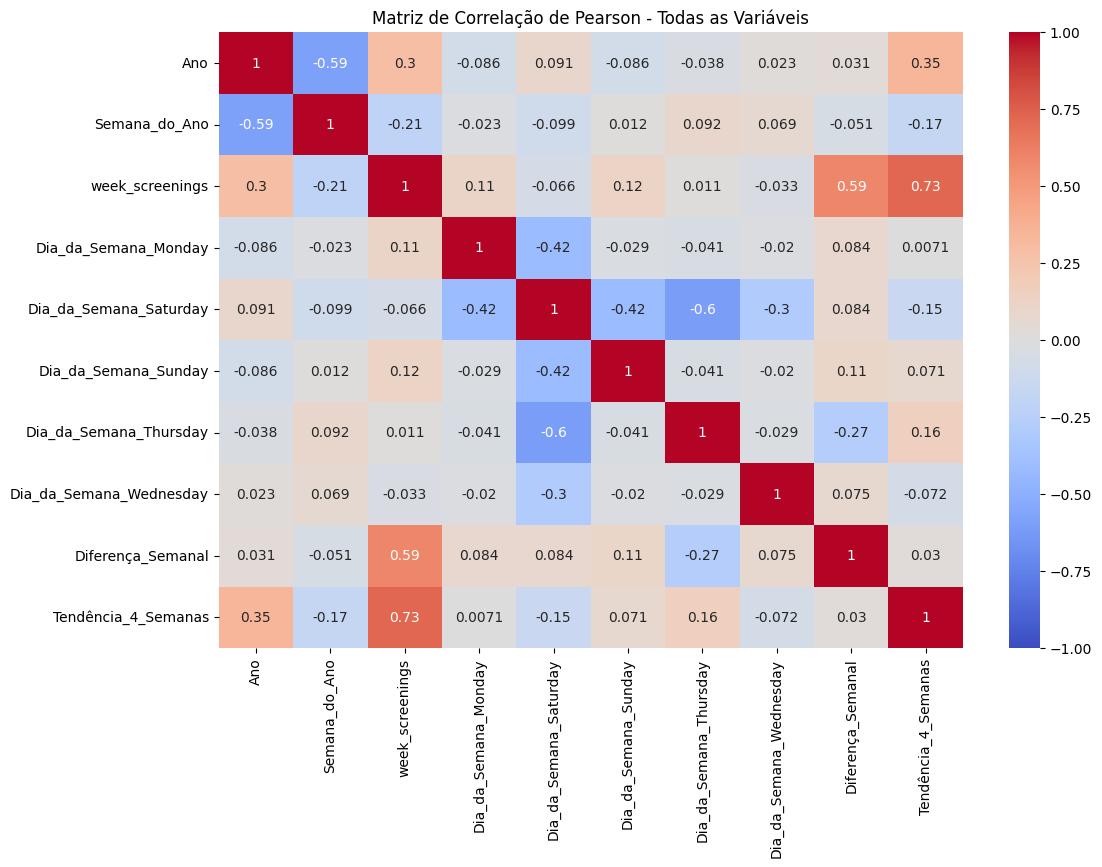

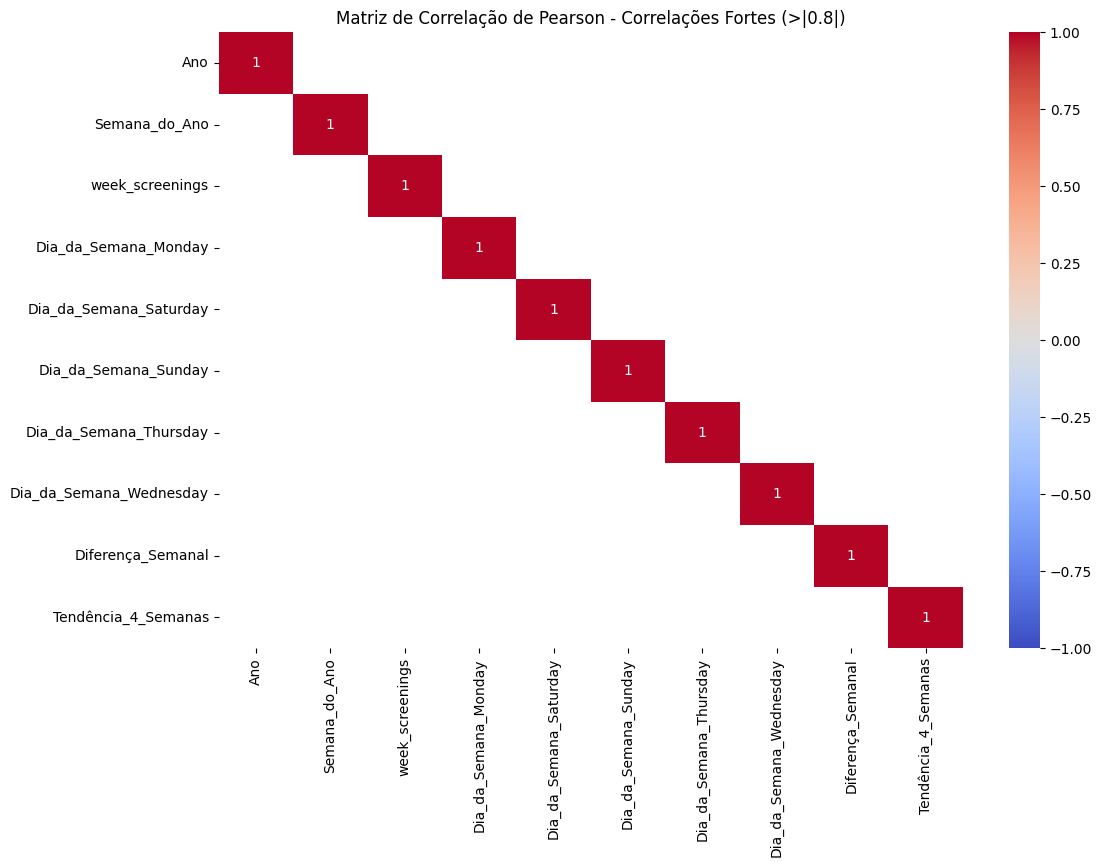

In [27]:
# Eliminar a primeira coluna (variável resposta)
df_sem_resposta = df.iloc[:, 1:]

# Calcular a correlação de Pearson
correlacao_pearson = df_sem_resposta.corr(method='pearson')

# Configuração do tamanho das figuras
plt.figure(figsize=(12, 8))
# Plotar a matriz de correlação com todas as correlações
sns.heatmap(correlacao_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson - Todas as Variáveis')
plt.show()
# Filtrar as correlações fortes (acima de 0.8 ou abaixo de -0.8)
correlacao_forte = correlacao_pearson[(correlacao_pearson > 0.8) | (correlacao_pearson < -0.8)]
# Plotar a matriz de correlação com as correlações fortes
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_forte, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson - Correlações Fortes (>|0.8|)')
plt.show()

Target daily uniformly distributed

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean_location.xlsx')
df['Location'] = df['Location'].str.strip()
df.loc[df['Location'].eq('Faro') & df['Screening_date'].eq('2022-08-13'), 'Screening_date'] = '2022-08-14'
df.loc[df['Location'].eq('Lisboa') & df['Screening_date'].eq('2023-05-15'), 'Screening_date'] = '2023-05-19'

df.head()

d1 = df.groupby(['Location', 'Screening_date'], as_index=False).size().sort_values(['Location', 'Screening_date'])
d2 = d1.assign(count = d1.groupby(['Location'])['Location'].transform('count'))
d2 = d2[d2['count'].ne(1)]

d2['ndays'] = d2.groupby('Location')['Screening_date'].diff()
d2['nscreens'] = d2['size'].values/d2['ndays'].dt.days
d2

date_range = pd.date_range(start='2022-03-03', end='2024-04-20') #datas mais extremas no dataset

datesdf = pd.DataFrame(date_range, columns=['Screening_date'])

list_dfs = []

groups = d2.groupby('Location')

for _, group in groups:
    list_dfs.append(datesdf.merge(group, how='left').bfill().ffill())

d3 = pd.concat(list_dfs)
d3

# Agrupar por 'Screening_date' e calcular a soma de 'nscreens' para cada data (ou use outra função agregada como média)
d4 = d3.groupby('Screening_date', as_index=False)['nscreens'].sum()

# Criar variável de tendência linear
d4['days_since_start'] = (d4['Screening_date'] - d4['Screening_date'].min()).dt.days

# Se houver um padrão sazonal claro, você pode criar variáveis sazonais
# Por exemplo, seno e cosseno para capturar padrões sazonais anuais
d4['sin_seasonal'] = np.sin(2 * np.pi * d4['days_since_start'] / 365.25)
d4['cos_seasonal'] = np.cos(2 * np.pi * d4['days_since_start'] / 365.25)

df = d4

df

,Screening_date,nscreens,days_since_start,sin_seasonal,cos_seasonal
0,2022-03-03,11.169861,0,0.000000,1.000000
1,2022-03-04,11.169861,1,0.017202,0.999852
2,2022-03-05,11.169861,2,0.034398,0.999408
3,2022-03-06,11.169861,3,0.051584,0.998669
4,2022-03-07,11.169861,4,0.068755,0.997634
...,...,...,...,...,...
775,2024-04-16,12.874846,775,0.692903,0.721031
776,2024-04-17,12.874846,776,0.705204,0.709005
777,2024-04-18,12.874846,777,0.717295,0.696769
778,2024-04-19,12.874846,778,0.729175,0.684328


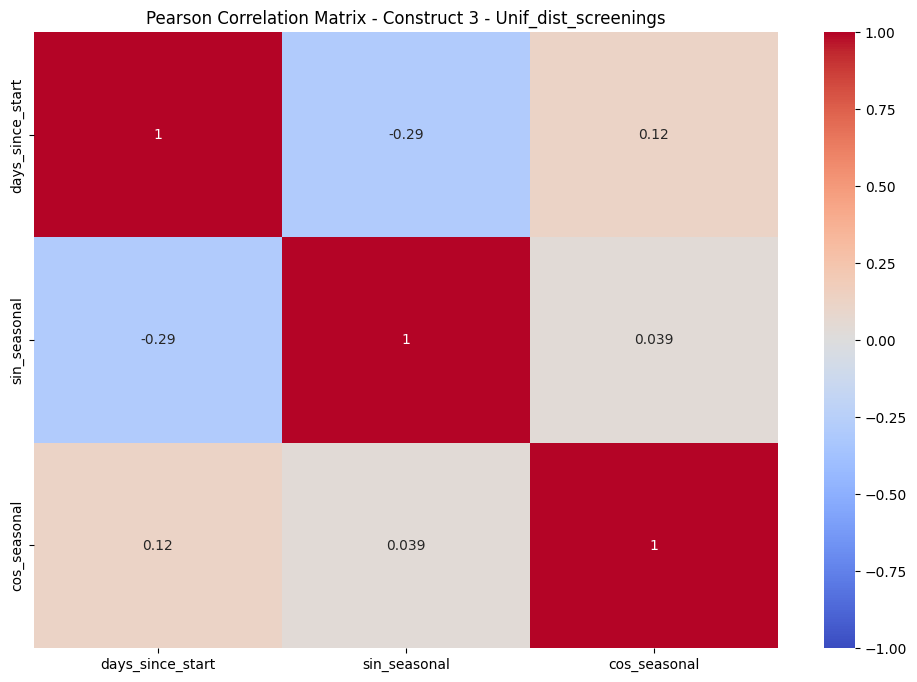

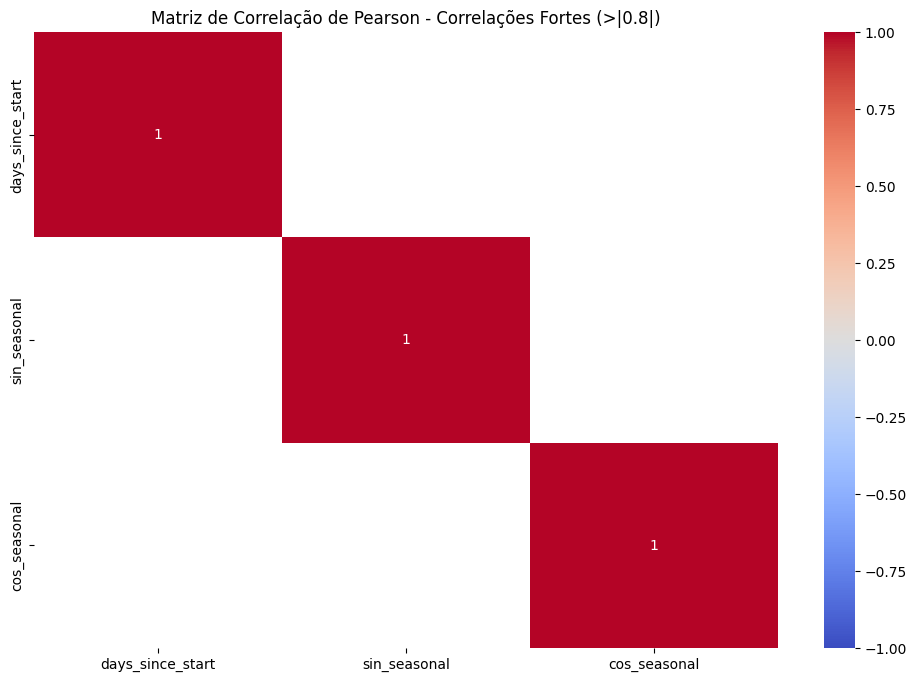

In [9]:
# Eliminar a primeira coluna (variável resposta)
df_sem_resposta = df.iloc[:, 2:]

# Calcular a correlação de Pearson
correlacao_pearson = df_sem_resposta.corr(method='pearson')

# Configuração do tamanho das figuras
plt.figure(figsize=(12, 8))
# Plotar a matriz de correlação com todas as correlações
sns.heatmap(correlacao_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix - Construct 3 - Unif_dist_screenings')
plt.show()
# Filtrar as correlações fortes (acima de 0.8 ou abaixo de -0.8)
correlacao_forte = correlacao_pearson[(correlacao_pearson > 0.8) | (correlacao_pearson < -0.8)]
# Plotar a matriz de correlação com as correlações fortes
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_forte, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson - Correlações Fortes (>|0.8|)')
plt.show()